**PROJECT TITLE=LATEST COVID-19 CONFIRMED CASES IN KERALA**

**PROBLEM STATEMENT:-TO PREDICT LATEST COVID-19 CONFIRMED CASES IN KERALA DATASET WITH THE HELP OF TIME SERIES ANALYSIS.**

**CONTENT:-**This dataset contains the confirmed Covid-19 cases in Kerala, India from January 31, 2020 to April 05, 2022.
It contains dates and confirmed cases, which can be used for time series analysis.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
path="/content/drive/MyDrive/Time Series=KDA/Covid 19 Confirmed Cases-Kerala.csv"
df=pd.read_csv(path,parse_dates=["Date"], index_col="Date")
df

,Confirmed
Date,
2020-01-31,0.0
2020-02-01,0.0
2020-02-02,1.0
2020-02-03,1.0
2020-02-04,0.0
...,...
2022-04-01,418.0
2022-04-02,331.0
2022-04-03,310.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 796 entries, 2020-01-31 to 2022-04-05
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confirmed  796 non-null    float64
dtypes: float64(1)
memory usage: 12.4 KB


In [ ]:
df.head()

,Confirmed
Date,
2020-01-31,0.0
2020-02-01,0.0
2020-02-02,1.0
2020-02-03,1.0
2020-02-04,0.0


**ARIMA MODEL**

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
arima = ARIMA(df["Confirmed"], order=(1,1,1)) #p->AR ,d->I,q->MA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
arimafit = arima.fit(disp=False)

In [ ]:
ypred = arimafit.predict(len(df), len(df)+2, typ="levels")
ypred

2022-04-06    338.361105
2022-04-07    335.846014
2022-04-08    335.746425
Freq: D, dtype: float64

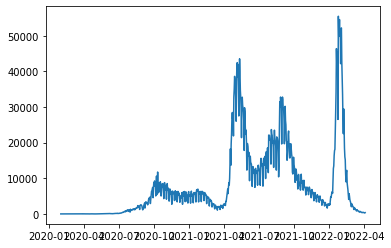

In [ ]:
plt.plot(df["Confirmed"])# THIS IS A SECULAR TREND.

In [ ]:
ypred

2022-04-06    338.361105
2022-04-07    335.846014
2022-04-08    335.746425
Freq: D, dtype: float64

In [ ]:
res = np.array(df["Confirmed"]).tolist() + ypred.tolist()

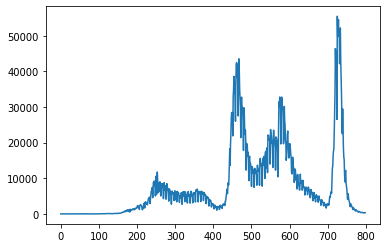

In [ ]:
plt.plot(res)

In [ ]:
df.shape

(796, 1)

In [ ]:
train = df["Confirmed"][:596]
test = df["Confirmed"][596:]

In [ ]:
print(train.shape)
print(test.shape)

(596,)
(200,)


**SCALE THE DATA**

In [ ]:
sc = MinMaxScaler()
train_scaled = sc.fit_transform(np.array(train).reshape(-1,1))
test_scaled = sc.fit_transform(np.array(test).reshape(-1,1))

In [ ]:
print(train_scaled.shape)

(596, 1)


In [ ]:
print(test_scaled.shape)

(200, 1)


In [ ]:
print(len(train_scaled))

596


In [ ]:
print(len(test_scaled))

200


**CONVERT THE DATA APPROPRIATE FOR THE SEQUENCE MODEL**

In [ ]:
def create_dataset(dataset, time_step=1):
  x,y = [], [] 
  for i in range(len(dataset)-time_step-1):
    sample = dataset[i: (i+time_step), 0]
    x.append(sample)
    y.append(dataset[i+time_step, 0])
  return np.array(x),np.array(y)

In [ ]:
time_step=50
xtrain, ytrain = create_dataset(train_scaled, time_step)
xtest, ytest = create_dataset(test_scaled, time_step)

print(xtrain.shape)
print(xtest.shape)

(545, 50)
(149, 50)


**RESHAPE INTO (SAMPLES,TIME STEPS,FEATURES)**

In [ ]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

print(xtrain.shape)
print(xtest.shape)

(545, 50, 1)
(149, 50, 1)


**LSTM MODEL**

In [ ]:
#step1 -: initialise the model
lstm = Sequential()

#step2 -: Add layers in your network
lstm.add(LSTM(32, return_sequences=True, input_shape=(time_step,1)))
lstm.add(LSTM(32,return_sequences=True))
lstm.add(LSTM(32))
lstm.add(Dense(1))

#step3 -: to establish the connection between the layers
lstm.compile(loss="mean_squared_error", optimizer="adam")

#step4 -: train the model
lstm.fit(xtrain, ytrain, epochs=20, batch_size=32)

#step5 -: make prediction
ypred = lstm.predict(xtest)

#step6 -: evaluating the model
mse = mean_squared_error(ytest, ypred)
print(f"MSE -: {mse}")
print(f"RMSE -: {np.sqrt(mse)}")

Epoch 1/20
18/18 [==============================] - 9s 40ms/step - loss: 0.0308
Epoch 2/20
18/18 [==============================] - 1s 33ms/step - loss: 0.0135
Epoch 3/20
18/18 [==============================] - 1s 33ms/step - loss: 0.0107
Epoch 4/20
18/18 [==============================] - 1s 33ms/step - loss: 0.0097
Epoch 5/20
18/18 [==============================] - 1s 33ms/step - loss: 0.0069
Epoch 6/20
18/18 [==============================] - 1s 33ms/step - loss: 0.0076
Epoch 7/20
18/18 [==============================] - 1s 33ms/step - loss: 0.0057
Epoch 8/20
18/18 [==============================] - 1s 33ms/step - loss: 0.0075
Epoch 9/20
18/18 [==============================] - 1s 32ms/step - loss: 0.0055
Epoch 10/20
18/18 [==============================] - 1s 33ms/step - loss: 0.0048
Epoch 11/20
18/18 [==============================] - 1s 33ms/step - loss: 0.0042
Epoch 12/20
18/18 [==============================] - 1s 33ms/step - loss: 0.0048
Epoch 13/20
18/18 [==================

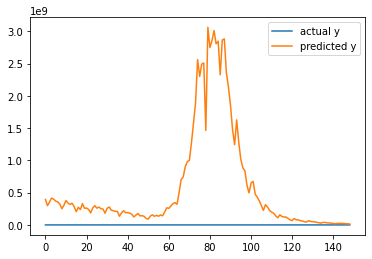

In [ ]:
ytest = np.array(ytest).reshape(-1,1)


ytest = sc.inverse_transform(ytest)
ypred = sc.inverse_transform(ytest)

plt.plot(ytest, label="actual y")
plt.plot(ypred, label="predicted y")
plt.legend()
plt.show()

**FORECAST FOR NEXT 30 DAYS**

In [ ]:
days=30
lastinput = xtest[-1]
lastoutput = ypred[-1]
yforecaste = []

for i in range(1, days+1):
  lastinput = np.append(lastinput[1:], lastoutput)
  lastoutput = lstm.predict(lastinput.reshape(1,50,1))
  yforecaste.append(lastoutput[0][0])

In [ ]:
yforecaste

[0.2377761,
 0.6093155,
 0.96893847,
 1.2236999,
 1.3605324,
 1.4076278,
 1.3979297,
 1.3564014,
 1.2993207,
 1.2363179,
 1.1725372,
 1.1103984,
 1.0507964,
 0.99384755,
 0.939322,
 0.88688326,
 0.8362079,
 0.7870369,
 0.73919547,
 0.69258547,
 0.64716715,
 0.6029371,
 0.559907,
 0.5180868,
 0.47747195,
 0.43804204,
 0.39975876,
 0.36257014,
 0.32641536,
 0.29122907]

**CONCLUSION:MY MODEL MSE IS:0.008202667295356458,
MY MODEL RMSE IS: 0.09056857785874999.**